# <center> Estatística</center>
<h1> Questão 1 - Diego Alex Maia</h1>
<h1>Questão 2 - Diego Alex Maia</h1>
<h1>Questão 3 - Samuel Agra</h1>
<h1>Questão 4 - Ivan Javier Pereira</h1>
<h1>Questão 5 - Samuel Agra</h1>
<h1>Questão 6 - Ivan Javier Pereira</h1>

# <center> 1- Quais são os 10 países com maior emissão total de CO₂ no ano mais recente disponível? </center>

In [1]:
import pandas as pd

# Carrega o dataset
df = pd.read_csv('/kaggle/input/co2-emissions-by-country/co2_emissions_kt_by_country.csv')

# Renomeia colunas
df.rename(columns={
    'Country Name': 'country_name',
    'Country Code': 'country_code',
    'Year': 'year',
    'CO2 Emissions in kiloton (kt)': 'value'
}, inplace=True)

# Lista de agregados que não são países reais
excluded_names = [
    "World", "IDA & IBRD total", "Low & middle income", "Middle income", "IBRD only",
    "Upper middle income", "Late-demographic dividend", "East Asia & Pacific", "High income",
    "East Asia & Pacific (excluding high income)", "East Asia & Pacific (IDA & IBRD countries)",
    "OECD members", "Post-demographic dividend", "Early-demographic dividend",
    "Europe & Central Asia", "Lower middle income", "North America",
    "Europe & Central Asia (IDA & IBRD countries)", "Europe & Central Asia (excluding high income)",
    "European Union", "South Asia", "South Asia (IDA & IBRD)", "Middle East & North Africa",
    "Euro area", "Arab World", "Latin America & Caribbean",
    "Latin America & the Caribbean (IDA & IBRD countries)",
    "Middle East & North Africa (excluding high income)",
    "Middle East & North Africa (IDA & IBRD countries)",
    "Latin America & Caribbean (excluding high income)", "IDA total", "Sub-Saharan Africa",
    "Sub-Saharan Africa (IDA & IBRD countries)", "Sub-Saharan Africa (excluding high income)",
    "Fragile and conflict affected situations", "Central Europe and the Baltics",
    "Africa Eastern and Southern", "IDA blend", "Pre-demographic dividend",
    "IDA only", "Least developed countries: UN classification"
]

# Filtra dados de 2018
df_2018 = df[df['year'] == 2018]

# Remove valores ausentes e converte para numérico
df_2018 = df_2018.dropna(subset=['value'])
df_2018['value'] = pd.to_numeric(df_2018['value'], errors='coerce')

# Remove entradas que não são países
df_2018 = df_2018[~df_2018['country_name'].isin(excluded_names)]

# Agrupa e seleciona os 10 maiores emissores
top10 = df_2018.groupby('country_name')['value'].sum().sort_values(ascending=False).head(10)

# Converte para gigatoneladas
top10_gt = top10 / 1_000_000

# Exibe resultado
print("Top 10 países com maiores emissões de CO₂ em 2018 (Gt):")
print(top10_gt.round(3))  # arredonda para 3 casas decimais

# Soma total dos 10 maiores emissores
soma_top10_gt = top10_gt.sum()
print(f"\nSoma total dos 10 maiores emissores: {soma_top10_gt:.3f} Gt")


Top 10 países com maiores emissões de CO₂ em 2018 (Gt):
country_name
China                 10.503
United States          4.975
India                  2.452
Russian Federation     1.661
Japan                  1.116
Germany                0.708
Iran, Islamic Rep.     0.637
Korea, Rep.            0.631
Canada                 0.580
Indonesia              0.577
Name: value, dtype: float64

Soma total dos 10 maiores emissores: 23.840 Gt


# <center> 2- Como se distribuem as emissões per capita entre os países? </center>

Estatísticas das emissões per capita em 2018:
Média: 4.0628
Mediana: 2.6034
Desvio padrão: 4.5750
Mínimo: 0.0262
Máximo: 32.4156


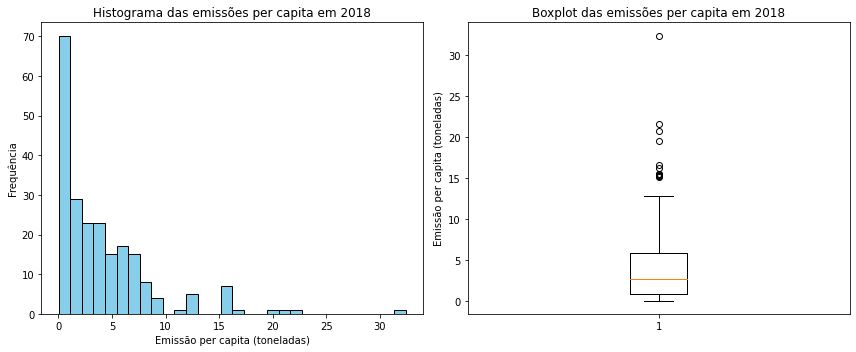

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('/kaggle/input/co2-emissions-1960-2018/CO2_Emissions_1960-2018.csv')

# Renomear a coluna para padronizar
df = df.rename(columns={'Country Name': 'Country'})

# Último ano disponível (última coluna do dataframe)
latest_year = df.columns[-1]

# Selecionar as colunas relevantes: País e último ano
df_latest = df[['Country', latest_year]].copy()

# Renomear para facilitar
df_latest = df_latest.rename(columns={latest_year: 'CO2_Emissions'})

# Converter para numérico, tratar erros
df_latest['CO2_Emissions'] = pd.to_numeric(df_latest['CO2_Emissions'], errors='coerce')

# Filtrar para remover agregados e grupos regionais
excluir = [
    'World', 'High income', 'Low income', 'Upper middle income', 'Lower middle income',
    'OECD members', 'European Union', 'Arab World', 'Sub-Saharan Africa', 
    'East Asia & Pacific', 'Europe & Central Asia', 'Middle East & North Africa',
    'South Asia', 'Latin America & Caribbean', 'North America', 'Post-demographic dividend',
    'Pre-demographic dividend'
]
df_latest = df_latest[~df_latest['Country'].isin(excluir)]

# Remover valores ausentes
df_latest = df_latest.dropna(subset=['CO2_Emissions'])

# Calcular estatísticas descritivas
media = df_latest['CO2_Emissions'].mean()
mediana = df_latest['CO2_Emissions'].median()
desvio_padrao = df_latest['CO2_Emissions'].std()
minimo = df_latest['CO2_Emissions'].min()
maximo = df_latest['CO2_Emissions'].max()

print(f"Estatísticas das emissões per capita em {latest_year}:")
print(f"Média: {media:.4f}")
print(f"Mediana: {mediana:.4f}")
print(f"Desvio padrão: {desvio_padrao:.4f}")
print(f"Mínimo: {minimo:.4f}")
print(f"Máximo: {maximo:.4f}")

# Visualização: Histograma e Boxplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_latest['CO2_Emissions'], bins=30, color='skyblue', edgecolor='black')
plt.title(f'Histograma das emissões per capita em {latest_year}')
plt.xlabel('Emissão per capita (toneladas)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.boxplot(df_latest['CO2_Emissions'], vert=True)
plt.title(f'Boxplot das emissões per capita em {latest_year}')
plt.ylabel('Emissão per capita (toneladas)')

plt.tight_layout()
plt.show()


# <center>3- Quais regiões (continentes) apresentam as maiores variações nas emissões totais ao longo das décadas </center>

Continentes com maior variabilidade nas emissões por década:

 Década Continente  Média de Emissões (Kt)  Desvio Padrão (Kt)
   1960     Europe            1,332,840.97        3,644,361.29
   1970     Europe            2,122,868.25        5,764,915.24
   1980     Europe            2,480,790.04        7,283,916.93
   1990       Asia            1,608,474.62        4,822,937.41
   2000       Asia            2,572,470.00        8,910,424.02
   2010       Asia            4,177,616.13       15,938,011.16


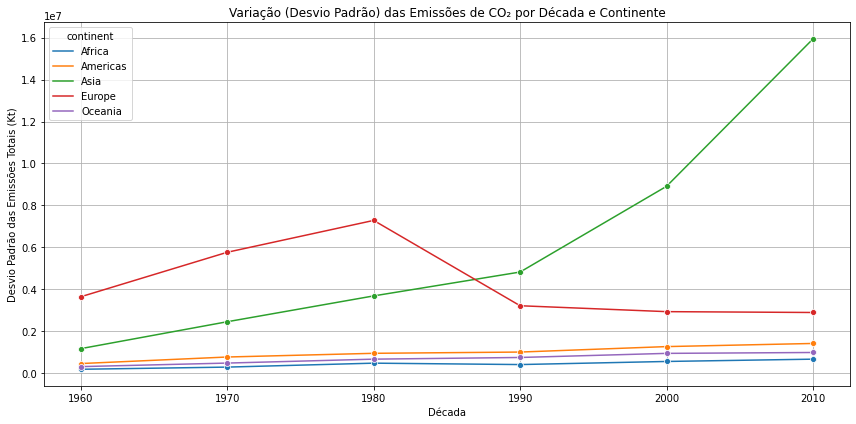

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Carregar o dataset de emissões

df = pd.read_csv('/kaggle/input/co2-emissions-by-country/co2_emissions_kt_by_country.csv')

#Renomear colunas de acordo com a estrutura real do dataset

df = df.rename(columns={
'country_name': 'Country',
'year': 'Year',
'value': 'CO2_Emissions'
})

#Remover entradas que não são países reais (agregados globais ou regionais)

excluded_names = [
"World", "Asia", "Africa", "Europe", "European Union", "North America",
"South America", "Oceania", "Antarctica", "High-income countries",
"Low-income countries", "Upper-middle-income countries", "Lower-middle-income countries",
"International transport"
]
df = df[~df['Country'].isin(excluded_names)]

#Carregar o dataset de países para continentes

continent_map = pd.read_csv('/kaggle/input/country-to-continent/countryContinent.csv', encoding='latin1')

#Fazer o merge para incluir o continente

df = df.merge(continent_map, left_on='Country', right_on='country', how='left')
df = df.dropna(subset=['continent'])

#Criar coluna década

df['Decade'] = (df['Year'] // 10) * 10

#Agrupar por continente, década e país somando emissões

grouped = df.groupby(['continent', 'Decade', 'Country'])['CO2_Emissions'].sum().reset_index()

#Calcular média e desvio padrão das emissões por continente e década

stats = grouped.groupby(['continent', 'Decade'])['CO2_Emissions'].agg(['mean', 'std']).reset_index()

#Encontrar o continente com maior desvio padrão em cada década

top_by_decade = stats.sort_values('std', ascending=False).groupby('Decade').first().reset_index()
top_by_decade = top_by_decade.sort_values('Decade')

#Mostrar tabela formatada

print("Continentes com maior variabilidade nas emissões por década:\n")
print(top_by_decade.rename(columns={
'continent': 'Continente',
'Decade': 'Década',
'mean': 'Média de Emissões (Kt)',
'std': 'Desvio Padrão (Kt)'
}).to_string(index=False, float_format='{:,.2f}'.format))

#Plotar gráfico de variação geral por década e continente

plt.figure(figsize=(12, 6))
sns.lineplot(data=stats, x='Decade', y='std', hue='continent', marker='o')
plt.title('Variação (Desvio Padrão) das Emissões de CO₂ por Década e Continente')
plt.xlabel('Década')
plt.ylabel('Desvio Padrão das Emissões Totais (Kt)')
plt.grid(True)
plt.tight_layout()
plt.show()

# <center> 4- Qual foi a tendência da emissão média anual global de CO₂ ao longo das décadas? </center>

   Decade         mean         std
0    1960   834.772769  138.925115
1    1970  1241.292614   61.330415
2    1980  1037.121302  106.588331
3    1990   960.054568   20.177203
4    2000  1031.443152   40.307369
5    2010  1011.828498   21.598212


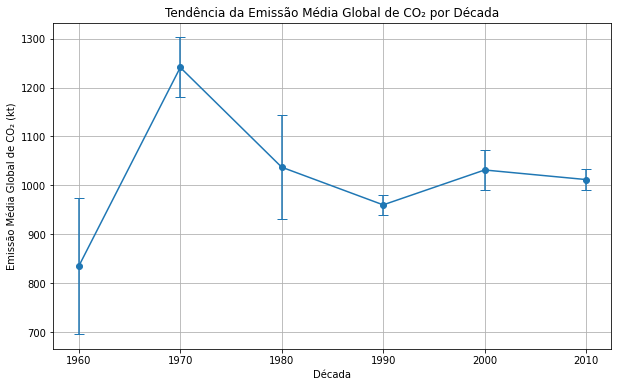

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('/kaggle/input/co2-emissions-1960-2018/CO2_Emissions_1960-2018.csv')

# Ajustar nome das colunas se necessário
df.columns = df.columns.str.strip()

# Transpor os dados para ter anos como índice
df_years = df.drop(columns=['Country Name'])
df_years = df_years.set_index(df['Country Name'])

# Somar emissões globais por ano (ignorando valores ausentes)
total_global = df_years.sum(axis=0, skipna=True)
total_global.index = total_global.index.astype(int)

# Criar uma nova coluna com a década correspondente
df_decade = total_global.reset_index()
df_decade.columns = ['Year', 'Total_CO2']
df_decade['Decade'] = (df_decade['Year'] // 10) * 10

# Agrupar por década e calcular média e desvio padrão
stats_by_decade = df_decade.groupby('Decade')['Total_CO2'].agg(['mean', 'std']).reset_index()

# Exibir os resultados
print(stats_by_decade)

# Plotar tendência
plt.figure(figsize=(10, 6))
plt.errorbar(stats_by_decade['Decade'], stats_by_decade['mean'],
             yerr=stats_by_decade['std'], fmt='-o', capsize=5)
plt.title('Tendência da Emissão Média Global de CO₂ por Década')
plt.xlabel('Década')
plt.ylabel('Emissão Média Global de CO₂ (kt)')
plt.grid(True)
plt.show()

# <center> 5- Quais países apresentam as maiores diferenças entre emissão total e emissão per capita no último ano? </center>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os datasets
co2_total = pd.read_csv('/kaggle/input/co2-emissions-by-country/co2_emissions_kt_by_country.csv')
co2_percapita = pd.read_csv('/kaggle/input/co2-emissions-1960-2018/CO2_Emissions_1960-2018.csv')
population_df = pd.read_csv('/kaggle/input/world-population-dataset/world_population.csv')

# Renomear colunas dos datasets de emissões
co2_total = co2_total.rename(columns={
    'country_name': 'Country',
    'year': 'Year',
    'value': 'CO2_kt'
})

# Lista de agregados que não são países reais
excluded_names = [
    "World", "IDA & IBRD total", "Low & middle income", "Middle income", "IBRD only",
    "Upper middle income", "Late-demographic dividend", "East Asia & Pacific", "High income",
    "East Asia & Pacific (excluding high income)", "East Asia & Pacific (IDA & IBRD countries)",
    "OECD members", "Post-demographic dividend", "Early-demographic dividend",
    "Europe & Central Asia", "Lower middle income", "North America",
    "Europe & Central Asia (IDA & IBRD countries)", "Europe & Central Asia (excluding high income)",
    "European Union", "South Asia", "South Asia (IDA & IBRD)", "Middle East & North Africa",
    "Euro area", "Arab World", "Latin America & Caribbean",
    "Latin America & the Caribbean (IDA & IBRD countries)",
    "Middle East & North Africa (excluding high income)",
    "Middle East & North Africa (IDA & IBRD countries)",
    "Latin America & Caribbean (excluding high income)", "IDA total", "Sub-Saharan Africa",
    "Sub-Saharan Africa (IDA & IBRD countries)", "Sub-Saharan Africa (excluding high income)",
    "Fragile and conflict affected situations", "Central Europe and the Baltics",
    "Africa Eastern and Southern", "IDA blend", "Pre-demographic dividend",
    "IDA only", "Least developed countries: UN classification"
]

co2_percapita = co2_percapita.rename(columns={'Country Name': 'Country'})
co2_percapita = co2_percapita.melt(id_vars=['Country'], var_name='Year', value_name='CO2_t_per_capita')
co2_percapita['Year'] = co2_percapita['Year'].astype(int)

# Unir os datasets de emissões (total e per capita)
df = co2_total.merge(co2_percapita, on=['Country', 'Year'], how='inner')
df = df.dropna(subset=['CO2_kt', 'CO2_t_per_capita'])

# Filtrar para o último ano disponível (2018 no per capita)
latest_year = 2018
df_latest = df[df['Year'] == latest_year]

# Ajustar nome da coluna de população e usar a população de 2020 (mais próxima)
population_df = population_df.rename(columns={'Country/Territory': 'Country', '2020 Population': 'Population'})

# Mesclar com dados de população
merged = df_latest.merge(population_df[['Country', 'Population']], on='Country', how='left')

# Remover entradas sem população
merged = merged.dropna(subset=['Population'])

# Converter população para número inteiro
merged['Population'] = merged['Population'].astype(float)

# Calcular emissão per capita estimada: CO2_kt * 1000 / população (toneladas por pessoa)
merged['CO2_per_capita_calc'] = (merged['CO2_kt'] * 1000) / merged['Population']

# Calcular diferença entre o valor per capita do dataset e o calculado pela população
merged['Diff_per_capita_t'] = (merged['CO2_t_per_capita'] - merged['CO2_per_capita_calc']).abs()

# Ordenar para achar os 5 maiores e menores discrepantes
top5_high = merged.sort_values('Diff_per_capita_t', ascending=False).head(5)
top5_low = merged.sort_values('Diff_per_capita_t', ascending=True).head(5)

# Função para mostrar resultados formatados
def show_top_compact(title, data):
    print(f"\n{title} ({latest_year}):")
    print(f"{'País':<25} {'CO2 Total (kt)':>10} {'CO2 per capita (orig)':>15} {'CO2 per capita (calc)':>15} {'Diferença (t)':>15}")
    print("-" * 100)
    for _, row in data.iterrows():
        print(f"{row['Country']:<25} {row['CO2_kt']:>10,.2f} {row['CO2_t_per_capita']:>15,.3f} {row['CO2_per_capita_calc']:>15,.3f} {row['Diff_per_capita_t']:>15,.3f}")

# Usar para mostrar
show_top_compact("Top 5 países com MAIOR discrepância entre emissão per capita declarada e calculada", top5_high)
show_top_compact("Top 5 países com MENOR discrepância entre emissão per capita declarada e calculada", top5_low)


Top 5 países com MAIOR discrepância entre emissão per capita declarada e calculada (2018):
País                      CO2 Total (kt) CO2 per capita (orig) CO2 per capita (calc)   Diferença (t)
----------------------------------------------------------------------------------------------------
Palau                         250.00          16.191          13.911           2.281
United Arab Emirates      177,120.00          20.797          19.071           1.726
Nauru                          60.00           6.556           4.872           1.683
Iceland                     1,700.00           6.237           4.636           1.601
Oman                       75,600.00          15.192          16.640           1.447

Top 5 países com MENOR discrepância entre emissão per capita declarada e calculada (2018):
País                      CO2 Total (kt) CO2 per capita (orig) CO2 per capita (calc)   Diferença (t)
----------------------------------------------------------------------------------------

# <center> 6- Como se distribui a emissão média anual por renda (alta, média, baixa) dos países? </center>


Distribuição das emissões médias anuais por grupo de renda (2010-2018):
        Faixa de Renda  Média das Emissões (t/hab)  Desvio Padrão
0          High income                    8.980677       5.924348
1           Low income                    0.285528       0.415304
2  Lower middle income                    1.034982       0.859918
3  Upper middle income                    3.816073       2.725019


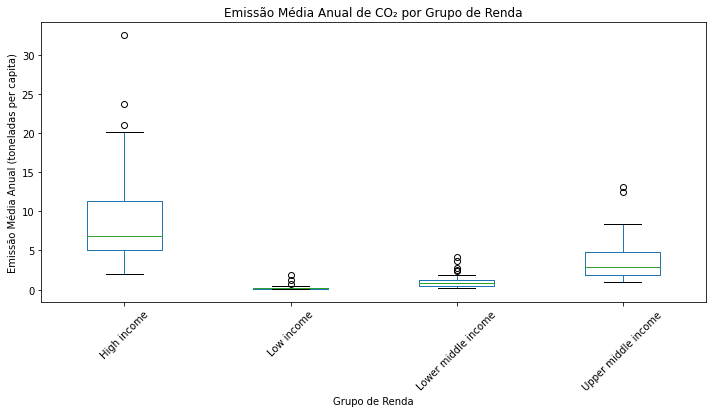

In [6]:
import pandas as pd

# === 1. LER O ARQUIVO DE EMISSÕES CO2 ===
emissoes = pd.read_csv('/kaggle/input/co2-emissions-1960-2018/CO2_Emissions_1960-2018.csv')

# Verificar colunas e anos disponíveis
#print(emissoes.columns)

# Selecionar anos recentes (exemplo: 2010 a 2018)
anos = [str(ano) for ano in range(2010, 2019)]
emissoes['Emissao_Media_Anual'] = emissoes[anos].mean(axis=1, skipna=True)


# Manter apenas nome do país e emissão média
#emissoes = emissoes[['Country Name ', 'Emissao_Media_Anual']]

# Renomear a coluna 'Country Name' para 'Country Code'
#emissoes = emissoes.rename(columns={'Country Name': 'Country Code'})

#emissoes.columns = ['Country Code', 'Emissao_Media_Anual']


# === 2. LER O ARQUIVO DE CLASSIFICAÇÃO DE RENDA ===
renda = pd.read_csv('/kaggle/input/world-bank-contry/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_127285.csv', skiprows=0)
renda = renda[['Country Code', 'IncomeGroup', 'TableName']].dropna()

renda = renda.rename(columns={'TableName': 'Country Name'})


# === 3. JUNTAR OS DOIS DATAFRAMES PELO NOME DO PAÍS ===
df = pd.merge(emissoes, renda, on='Country Name', how='inner')


# === 4. AGRUPAR POR FAIXA DE RENDA E CALCULAR MÉDIA E DESVIO PADRÃO ===
resultado = df.groupby('IncomeGroup')['Emissao_Media_Anual'].agg(['mean', 'std']).reset_index()

# Renomear colunas para clareza
resultado.columns = ['Faixa de Renda', 'Média das Emissões (t/hab)', 'Desvio Padrão']

# === 5. EXIBIR RESULTADO FINAL ===
print("\nDistribuição das emissões médias anuais por grupo de renda (2010-2018):")
print(resultado)


# Filtrar para manter apenas colunas relevantes e remover valores ausentes
df_plot = df[['IncomeGroup', 'Emissao_Media_Anual']].dropna()

# Criar boxplot com pandas
df_plot.boxplot(column='Emissao_Media_Anual', by='IncomeGroup', grid=False, rot=45, figsize=(10, 6))

# Ajustar título e rótulos
import matplotlib.pyplot as plt
plt.title('Emissão Média Anual de CO₂ por Grupo de Renda')
plt.suptitle('')  # Remove o título automático do pandas
plt.xlabel('Grupo de Renda')
plt.ylabel('Emissão Média Anual (toneladas per capita)')
plt.tight_layout()
plt.show()